# ADVANCED REGRESSION FOR HOUSING PRICES PREDICTION

## Data Preparation
### Data Cleaning
#### Understanding Dataset

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing warnings to suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Increasing limit of columns displayed to see all columns
pd.set_option('display.max_columns',None)

In [2]:
# Using scikit learn library
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_absolute_error

In [3]:
# Reading the dataset
data = pd.read_csv('train.csv',index_col = 'Id')
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Understanding dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
# General numerical understanding of dataset
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Checking duplicate values

In [6]:
# Finding the duplicate values
data[data.duplicated()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [7]:
# Removing the duplicate data point
data = data[~data.duplicated()]

#### Treating Missing values (Catagorical)

In [8]:
# Treating missing values in catagorical columns
## Filling all catagorical missing values with 'None' as all missing values are missing as relevant features are not present
## in that particular house data point.
cat_cols = data.select_dtypes(include = 'object')
for col in cat_cols:
    data[col] = data[col].fillna(value = 'None')
    
# Checking number of missing values
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

#### Handling biased columns (columns with one entry with count more than all other entries)

In [9]:
# Removing all biased columns (columns with more than 50% values for single entry)
for col in cat_cols:
    if data[col].value_counts().max() >= 0.50*data.shape[0]:
        data.drop(columns = col,axis = 1,inplace = True)
        
# Checking the columns left
data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'Foundation', 'BsmtQual',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

#### Treating missing values (Numerical columns)

In [10]:
# Finding numerical columns
num_cols = data.select_dtypes(include = ('int64','float64')).columns

# Finding numerical columns with missing values
data[num_cols].columns[data[num_cols].isnull().sum() > 0]

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [11]:
# Filling missing values with median of respective columns
data['LotFrontage'].fillna(value = data['LotFrontage'].median(),inplace = True)
data['MasVnrArea'].fillna(value = data['MasVnrArea'].median(),inplace = True)

# Filling missing values as 0 since in these houses there are no garage.
data['GarageYrBlt'].fillna(value = 0,inplace = True)

In [12]:
# Checking columns having missing values
data.columns[data.isnull().sum() > 0]

# No columns in the dataset has missing values.

Index([], dtype='object')

#### Converting columns with Years data into Age data for ease in comparison

In [13]:
# Subtracting 2021(assuming current year) with year data to get age data.
data['GarageAge'] = 2021 - data['GarageYrBlt']
data['HouseAge'] = 2021 - data['YearBuilt']
data['RemodAge'] = 2021 - data['YearRemodAdd']
data['SellAge'] = 2021 - data['YrSold']

# Dropping all year data columns
data.drop(columns = ['GarageYrBlt','YearBuilt','YearRemodAdd','YrSold'],axis = 1,inplace = True)

In [14]:
# Inspecting the dataset
data.head()

# All year columns have been converted into age columns and dropped.

,MSSubClass,LotFrontage,LotArea,Neighborhood,HouseStyle,OverallQual,OverallCond,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,GarageAge,HouseAge,RemodAge,SellAge
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,CollgCr,2Story,7,5,VinylSd,VinylSd,196.0,PConc,Gd,GLQ,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,None,RFn,2,548,0,61,0,0,0,0,0,2,208500,18.0,18,18,13
2,20,80.0,9600,Veenker,1Story,6,8,MetalSd,MetalSd,0.0,CBlock,Gd,ALQ,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,TA,RFn,2,460,298,0,0,0,0,0,0,5,181500,45.0,45,45,14
3,60,68.0,11250,CollgCr,2Story,7,5,VinylSd,VinylSd,162.0,PConc,Gd,GLQ,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,TA,RFn,2,608,0,42,0,0,0,0,0,9,223500,20.0,20,19,13
4,70,60.0,9550,Crawfor,2Story,7,5,Wd Sdng,Wd Shng,0.0,BrkTil,TA,ALQ,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,Gd,Unf,3,642,0,35,272,0,0,0,0,2,140000,23.0,106,51,15
5,60,84.0,14260,NoRidge,2Story,8,5,VinylSd,VinylSd,350.0,PConc,Gd,GLQ,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,TA,RFn,3,836,192,84,0,0,0,0,0,12,250000,21.0,21,21,13


#### Dealing the ordered Catagorical data
Dummies are not created for ordered list data as it is mapped to integers showing their corresponding ranks.<br>
'None' are mapped to -1 not to 0 as it will imply absence of data point. -1 will correspond to the rank of the entries also.

In [15]:
# Checking value counts for 'GarageFinish' column
data['GarageFinish'].value_counts()

Unf     605
RFn     422
Fin     352
None     81
Name: GarageFinish, dtype: int64

In [16]:
# Mapping data
data.GarageFinish = data.GarageFinish.map({'None':-1,'Unf':1,'RFn':2,'Fin':3})
data['GarageFinish'].value_counts()

 1    605
 2    422
 3    352
-1     81
Name: GarageFinish, dtype: int64

In [17]:
# Checking value counts for 'BsmtFinType1' column
data['BsmtFinType1'].value_counts()

Unf     430
GLQ     418
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: BsmtFinType1, dtype: int64

In [18]:
# Mapping data
data.BsmtFinType1 = data.BsmtFinType1.map({'None':-1,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
data['BsmtFinType1'].value_counts()

 1    430
 6    418
 5    220
 4    148
 3    133
 2     74
-1     37
Name: BsmtFinType1, dtype: int64

In [19]:
# Checking value counts for 'BsmtQual' column
data['BsmtQual'].value_counts()

TA      649
Gd      618
Ex      121
None     37
Fa       35
Name: BsmtQual, dtype: int64

In [20]:
# Mapping data
data.BsmtQual = data.BsmtQual.map({'None':-1,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
data['BsmtQual'].value_counts()

 3    649
 4    618
 5    121
-1     37
 2     35
Name: BsmtQual, dtype: int64

In [21]:
# Checking data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Neighborhood   1460 non-null   object 
 4   HouseStyle     1460 non-null   object 
 5   OverallQual    1460 non-null   int64  
 6   OverallCond    1460 non-null   int64  
 7   Exterior1st    1460 non-null   object 
 8   Exterior2nd    1460 non-null   object 
 9   MasVnrArea     1460 non-null   float64
 10  Foundation     1460 non-null   object 
 11  BsmtQual       1460 non-null   int64  
 12  BsmtFinType1   1460 non-null   int64  
 13  BsmtFinSF1     1460 non-null   int64  
 14  BsmtFinSF2     1460 non-null   int64  
 15  BsmtUnfSF      1460 non-null   int64  
 16  TotalBsmtSF    1460 non-null   int64  
 17  1stFlrSF       1460 non-null   int64  
 18  2ndFlrSF

#### Dealing with Unordered Catagorical data
This data is required to be dummified.

In [22]:
# Finding unordered Catagorical columns (These are only the object type data left in the dataset.)
dum_col = data.select_dtypes(include = 'object').columns

# Crearing dummy columns & concatenating the dataset.
for i in dum_col:
    a = pd.get_dummies(data = data[i],prefix = i,drop_first = True)
    data.drop(columns = i,axis = 1, inplace = True)
    data = pd.concat([data,a],axis = 1)
    a = pd.DataFrame()

# inspecing dataset
data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,GarageAge,HouseAge,RemodAge,SellAge,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,196.0,4,6,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,2,548,0,61,0,0,0,0,0,2,208500,18.0,18,18,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
2,20,80.0,9600,6,8,0.0,4,5,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,2,460,298,0,0,0,0,0,0,5,181500,45.0,45,45,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,60,68.0,11250,7,5,162.0,4,6,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,2,608,0,42,0,0,0,0,0,9,223500,20.0,20,19,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,70,60.0,9550,7,5,0.0,3,5,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1,3,642,0,35,272,0,0,0,0,2,140000,23.0,106,51,15,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
5,60,84.0,14260,8,5,350.0,4,6,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2,3,836,192,84,0,0,0,0,0,12,250000,21.0,21,21,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,0.0,4,1,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,2,460,0,40,0,0,0,0,0,8,175000,22.0,22,21,14,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1457,20,85.0,13175,6,6,119.0,4,5,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1,2,500,349,0,

#### Checking data distribution for continuous numerical columns

In [23]:
# Creating list of continuous numerical columns 
num_col = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','MiscVal','SalePrice','GarageAge','HouseAge','RemodAge']

# finding number of continuous numerical columns
len(num_col)

18

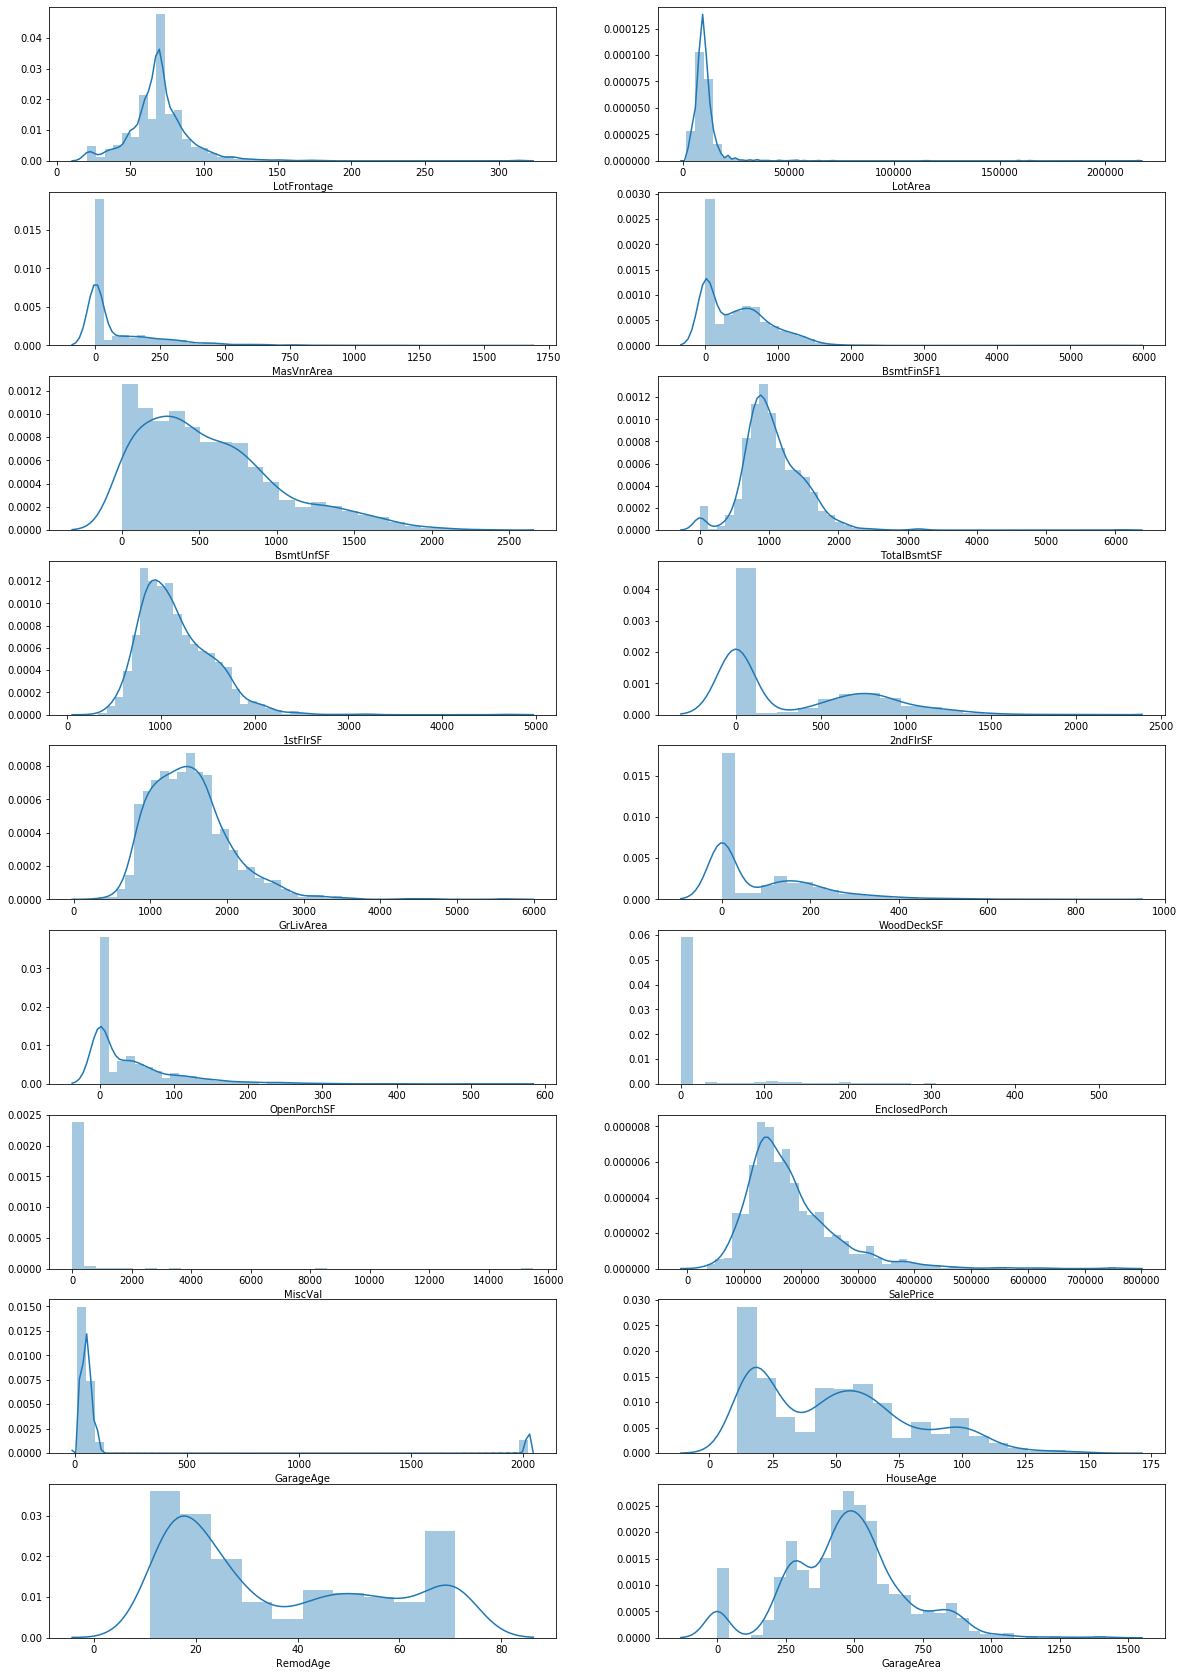

In [24]:
# Plotting histogram for continuous numerical columns
fig,ax = plt.subplots(nrows = 9,ncols = 2,figsize = [20,30])
sns.distplot(data['LotFrontage'],ax = ax[0,0])
sns.distplot(data['LotArea'],ax = ax[0,1])
sns.distplot(data['MasVnrArea'],ax = ax[1,0])
sns.distplot(data['BsmtFinSF1'],ax = ax[1,1])
sns.distplot(data['BsmtUnfSF'],ax = ax[2,0])
sns.distplot(data['TotalBsmtSF'],ax = ax[2,1])
sns.distplot(data['1stFlrSF'],ax = ax[3,0])
sns.distplot(data['2ndFlrSF'],ax = ax[3,1])
sns.distplot(data['GrLivArea'],ax = ax[4,0])
sns.distplot(data['WoodDeckSF'],ax = ax[4,1])
sns.distplot(data['OpenPorchSF'],ax = ax[5,0])
sns.distplot(data['EnclosedPorch'],ax = ax[5,1])
sns.distplot(data['MiscVal'],ax = ax[6,0])
sns.distplot(data['SalePrice'],ax = ax[6,1])
sns.distplot(data['GarageAge'],ax = ax[7,0])
sns.distplot(data['HouseAge'],ax = ax[7,1])
sns.distplot(data['RemodAge'],ax = ax[8,0])
sns.distplot(data['GarageArea'],ax = ax[8,1])
plt.show()

In [25]:
# Continuous numerical columns are not normally distributed so, the data needs to be transformed to more normal distribution.
# Using Log transformation, since log(0) is undefined so all zeros are replaced with 1 as log(1) is 0 & data will remain unaffected.
# Moreover transformation is required for outlier treatment.
for col in num_col:
    data[col].replace(to_replace = 0,value = 1,inplace = True)

In [26]:
# Converting continuous numerical data point with log transformation.
for col in num_col:
    data[col] = np.log(data[col])
    
# Inspecting the dataset
data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,GarageAge,HouseAge,RemodAge,SellAge,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,4.174387,9.041922,7,5,5.278115,4,6,6.559615,0,5.010635,6.752270,6.752270,6.749931,0,7.444249,1,0,2,1,3,1,8,0,2,2,6.306275,0.000000,4.110874,0.000000,0,0,0,0.000000,2,12.247694,2.890372,2.890372,2.890372,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
2,20,4.382027,9.169518,6,8,0.000000,4,5,6.885510,0,5.648974,7.140453,7.140453,0.000000,0,7.140453,0,1,2,0,3,1,6,1,2,2,6.131226,5.697093,0.000000,0.000000,0,0,0,0.000000,5,12.109011,3.806662,3.806662,3.806662,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,60,4.219508,9.328123,7,5,5.087596,4,6,6.186209,0,6.073045,6.824374,6.824374,6.763885,0,7.487734,1,0,2,1,3,1,6,1,2,2,6.410175,0.000000,3.737670,0.000000,0,0,0,0.000000,9,12.317167,2.995732,2.995732,2.944439,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,70,4.094345,9.164296,7,5,0.000000,3,5,5.375278,0,6.291569,6.628041,6.867974,6.628041,0,7.448334,1,0,1,0,3,1,7,1,1,3,6.464588,0.000000,3.555348,5.605802,0,0,0,0.000000,2,11.849398,3.135494,4.663439,3.931826,15,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
5,60,4.430817,9.565214,8,5,5.857933,4,6,6.484635,0,6.194405,7.043160,7.043160,6.959399,0,7.695303,1,0,2,1,4,1,9,1,2,3,6.728629,5.257495,4.430817,0.000000,0,0,0,0.000000,12,12.429216,3.044522,3.044522,3.044522,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

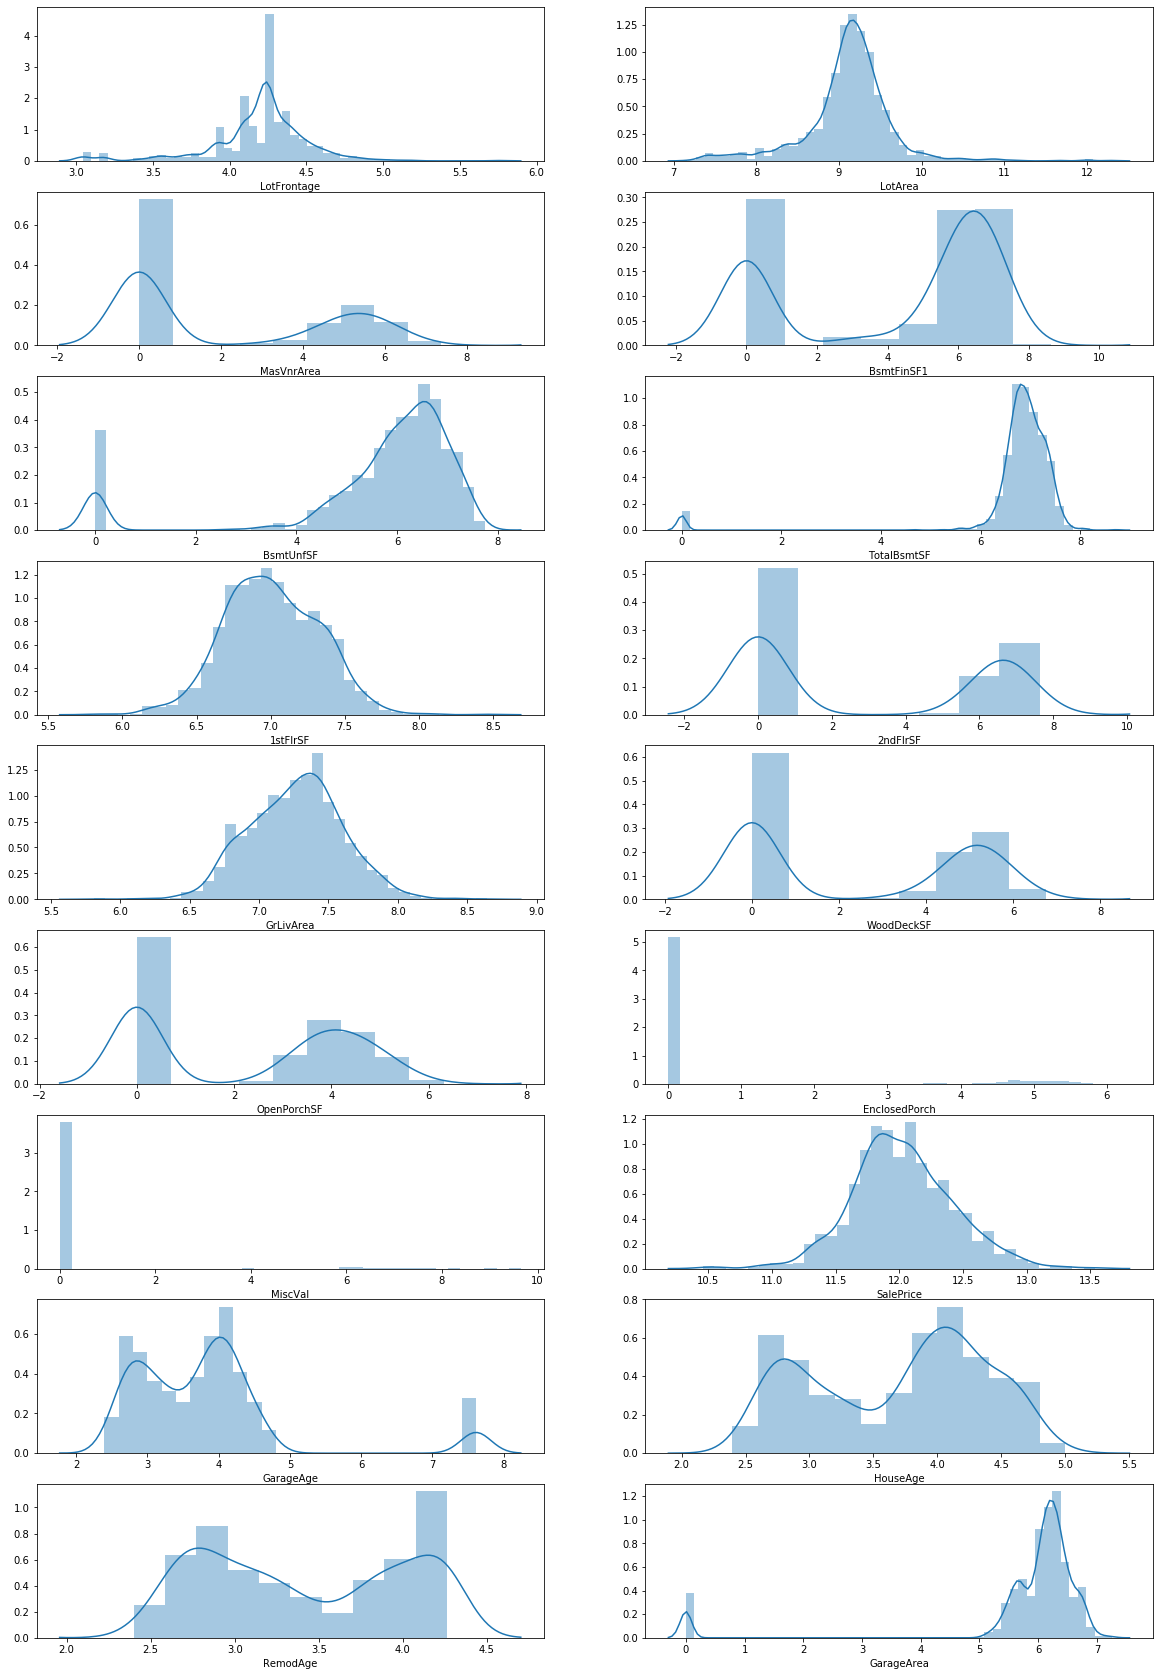

In [27]:
# Checking data distribution after log transformation
fig,ax = plt.subplots(nrows = 9,ncols = 2,figsize = [20,30])
sns.distplot(data['LotFrontage'],ax = ax[0,0])
sns.distplot(data['LotArea'],ax = ax[0,1])
sns.distplot(data['MasVnrArea'],ax = ax[1,0])
sns.distplot(data['BsmtFinSF1'],ax = ax[1,1])
sns.distplot(data['BsmtUnfSF'],ax = ax[2,0])
sns.distplot(data['TotalBsmtSF'],ax = ax[2,1])
sns.distplot(data['1stFlrSF'],ax = ax[3,0])
sns.distplot(data['2ndFlrSF'],ax = ax[3,1])
sns.distplot(data['GrLivArea'],ax = ax[4,0])
sns.distplot(data['WoodDeckSF'],ax = ax[4,1])
sns.distplot(data['OpenPorchSF'],ax = ax[5,0])
sns.distplot(data['EnclosedPorch'],ax = ax[5,1])
sns.distplot(data['MiscVal'],ax = ax[6,0])
sns.distplot(data['SalePrice'],ax = ax[6,1])
sns.distplot(data['GarageAge'],ax = ax[7,0])
sns.distplot(data['HouseAge'],ax = ax[7,1])
sns.distplot(data['RemodAge'],ax = ax[8,0])
sns.distplot(data['GarageArea'],ax = ax[8,1])
plt.show()

# Data is more normally distributed after log transformation.

## Spliting data into X & y

In [28]:
# y is kept as 'SalePrice' & X is kept as remaining dataset.
y = data.pop('SalePrice')
y_index = y.index
X = data
X_col = X.columns

In [29]:
# Using train_test_split functionality to split data into train & test sets.
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state = 13)

## Feature Selection using RFE

In [30]:
# Using Linear Regression estimator for RFE
estimator = LinearRegression()

# Selecting 60 top features from 110 features from the dataset
rfe = RFE(estimator = estimator, n_features_to_select = 60)

# Fitting training data to rfe Linear regression instance
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=60)

In [31]:
# Creating the rfe dataset storing column ranks & support
rfe_df = pd.DataFrame({'ranking' : rfe.ranking_,'col':X_train.columns,'support':rfe.support_})
rfe_df

,ranking,col,support
0,37,MSSubClass,False
1,1,LotFrontage,True
2,1,LotArea,True
3,1,OverallQual,True
4,1,OverallCond,True
...,...,...,...
104,1,FireplaceQu_Fa,True
105,1,FireplaceQu_Gd,True
106,1,FireplaceQu_None,True
107,1,FireplaceQu_Po,True


In [32]:
# Finding the columns selected through RFE and saving as 'final_cols'
final_cols = rfe_df[(rfe_df.support == True) & (rfe_df.ranking == 1)].col
final_cols

1               LotFrontage
2                   LotArea
3               OverallQual
4               OverallCond
6                  BsmtQual
12                 1stFlrSF
15                GrLivArea
16             BsmtFullBath
18                 FullBath
19                 HalfBath
21             KitchenAbvGr
23               Fireplaces
24             GarageFinish
25               GarageCars
36                 HouseAge
42     Neighborhood_ClearCr
43     Neighborhood_CollgCr
44     Neighborhood_Crawfor
45     Neighborhood_Edwards
46     Neighborhood_Gilbert
47      Neighborhood_IDOTRR
48     Neighborhood_MeadowV
49     Neighborhood_Mitchel
50       Neighborhood_NAmes
52      Neighborhood_NWAmes
53     Neighborhood_NoRidge
54     Neighborhood_NridgHt
55     Neighborhood_OldTown
57      Neighborhood_Sawyer
58     Neighborhood_SawyerW
59     Neighborhood_Somerst
60     Neighborhood_StoneBr
61      Neighborhood_Timber
62     Neighborhood_Veenker
63        HouseStyle_1.5Unf
65        HouseStyle

In [33]:
# Subsetting the data using 'final_cols'
X = data[final_cols]
X_col = X.columns

In [34]:
# Using train_test_split functionality to split data into train & test sets.
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state = 42)

## Lasso Regression

In [35]:
# Using GridSearch to find best regulatization coeff. for Lasso Regularization
# Using Lasso estimator
estimator = Lasso()

# Making a list of range of regularization coeff.
param_dict = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Keeping 5 fold cross-validation
folds = 5

# Creating a GridSearch instance and passing in above defined parameters
LM = GridSearchCV(estimator = estimator,
            cv = folds,
            param_grid = param_dict,
            scoring = 'neg_mean_absolute_error',
            return_train_score = True,
            verbose = 2)

# Fitting the Lasso instance with training data.
LM.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] alpha=0.0001 ....................................................
[CV] ..................................... alpha=0.0001, total=   0.1s
[CV] alpha=0.0001 ....................................................
[CV] ..................................... alpha=0.0001, total=   0.0s
[CV] alpha=0.0001 ....................................................
[CV] ..................................... alpha=0.0001, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] alpha=0.0001 ....................................................
[CV] ..................................... alpha=0.0001, total=   0.1s
[CV] alpha=0.0001 ....................................................
[CV] ..................................... alpha=0.0001, total=   0.1s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] 

[CV] ........................................ alpha=1.0, total=   0.0s
[CV] alpha=2.0 .......................................................
[CV] ........................................ alpha=2.0, total=   0.0s
[CV] alpha=2.0 .......................................................
[CV] ........................................ alpha=2.0, total=   0.0s
[CV] alpha=2.0 .......................................................
[CV] ........................................ alpha=2.0, total=   0.0s
[CV] alpha=2.0 .......................................................
[CV] ........................................ alpha=2.0, total=   0.0s
[CV] alpha=2.0 .......................................................
[CV] ........................................ alpha=2.0, total=   0.0s
[CV] alpha=3.0 .......................................................
[CV] ........................................ alpha=3.0, total=   0.0s
[CV] alpha=3.0 .......................................................
[CV] .

[CV] ........................................ alpha=100, total=   0.0s
[CV] alpha=100 .......................................................
[CV] ........................................ alpha=100, total=   0.0s
[CV] alpha=500 .......................................................
[CV] ........................................ alpha=500, total=   0.0s
[CV] alpha=500 .......................................................
[CV] ........................................ alpha=500, total=   0.0s
[CV] alpha=500 .......................................................
[CV] ........................................ alpha=500, total=   0.0s
[CV] alpha=500 .......................................................
[CV] ........................................ alpha=500, total=   0.0s
[CV] alpha=500 .......................................................
[CV] ........................................ alpha=500, total=   0.0s
[CV] alpha=1000 ......................................................
[CV] .

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    5.9s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=2)

In [36]:
# Finding the best parameter for Lasso regularization.
LM.best_params_

{'alpha': 0.001}

In [37]:
# Using GridSearch best coeff. for Lasso. instance
LM = Lasso(alpha = 0.001)

# Fitting Lasso instance with training data.
LM.fit(X_train,y_train)

# Predicting for test dataset.
y_pred = LM.predict(X_test)

In [38]:
# Checking r2_score performance
r2_score(y_test,y_pred)

0.8944717242403997

In [39]:
# Creating the Lasso selected coeff. dataframe
L_df = pd.DataFrame({'col':X_col,'coeff':LM.coef_})

# Removing the columns which are rejected by Lasso
L_df = L_df[L_df['coeff']!=0].sort_values(by = 'coeff',ascending = False)

# inspecting dataframe
L_df

,col,coeff
6,GrLivArea,0.301221
5,1stFlrSF,0.112748
31,Neighborhood_StoneBr,0.104786
1,LotArea,0.097587
39,Exterior1st_BrkFace,0.081480
17,Neighborhood_Crawfor,0.074123
26,Neighborhood_NridgHt,0.073128
25,Neighborhood_NoRidge,0.070364
7,BsmtFullBath,0.066443
2,OverallQual,0.061162


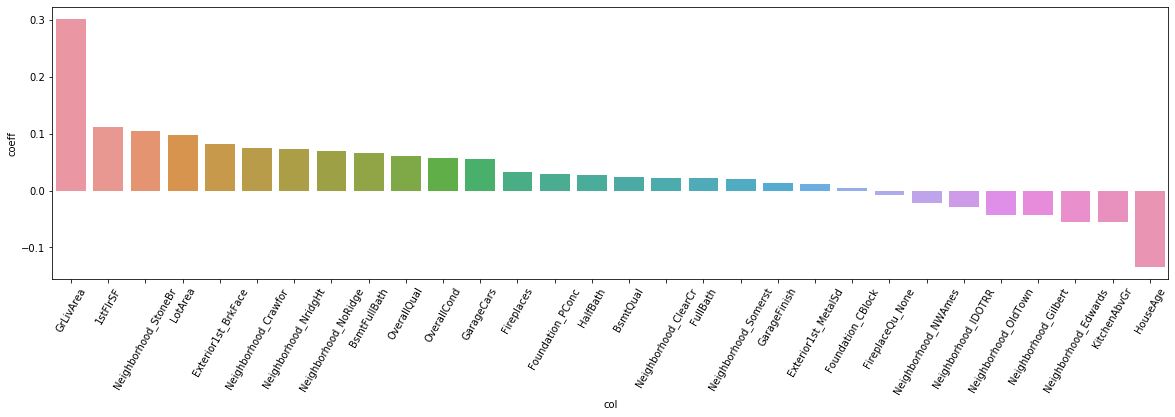

In [40]:
# ploting coeffs for Lasso Regression
plt.figure(figsize = [20,5])
a = sns.barplot(x = L_df['col'],y = L_df['coeff'])
a.set_xticklabels(labels = L_df['col'], rotation = 60)
plt.show()

According to Lasso Regression,below 10 features are most important in predicting house price:
    1. GrLivArea: Larger the above ground living area (square feet), higher the price of the house.
    2. HouseAge : Older the house, lesser the price.[negative relationship]
    3. 1stFlrSF: Larger the first Floor area (square feet), higher te price of the house.
    4. Neighborhood_StoneBr : Houses having Stone Brook in neighborhood are priced higher.
    5. LotArea: Larger the land size, higher the price of the house.
    6. Exterior1st_BrkFace : BrickFace exterior covering of the house are priced higher.
    7. Neighborhood_Crawfor : Houses having Crawford in neighborhood are priced higher.
    8. Neighborhood_NridgHt	 : Houses having Northridge Heights in neighborhood are priced higher.
    9. Neighborhood_NoRidge :  Houses having no ridge in neighborhood are priced higher.
    10. BsmtFullBath : Houses with full bathrooms in basement are priced higher.

# Ridge

In [41]:
# Using GridSearch to find best regulatization coeff. for Ridge Regularization
# Using Ridge estimator
estimator = Ridge()

# Making a list of range of regularization coeff.
param_dict = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Keeping 5 fold cross-validation
folds = 5

# Creating a GridSearch instance and passing in above defined parameters
RM = GridSearchCV(estimator = estimator,
                 cv = folds,
                 param_grid = param_dict,
                 scoring = 'neg_mean_absolute_error',
                 verbose = 2,
                 return_train_score = True)

# Fitting the Ridge instance with training data.
RM.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] alpha=0.0001 ....................................................
[CV] ..................................... alpha=0.0001, total=   0.0s
[CV] alpha=0.0001 ....................................................
[CV] ..................................... alpha=0.0001, total=   0.0s
[CV] alpha=0.0001 ....................................................
[CV] ..................................... alpha=0.0001, total=   0.0s
[CV] alpha=0.0001 ....................................................
[CV] ..................................... alpha=0.0001, total=   0.0s
[CV] alpha=0.0001 ....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................................... alpha=0.0001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ...................................... alpha=0.001, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] .

[CV] ........................................ alpha=1.0, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] ........................................ alpha=1.0, total=   0.0s
[CV] alpha=2.0 .......................................................
[CV] ........................................ alpha=2.0, total=   0.0s
[CV] alpha=2.0 .......................................................
[CV] ........................................ alpha=2.0, total=   0.0s
[CV] alpha=2.0 .......................................................
[CV] ........................................ alpha=2.0, total=   0.0s
[CV] alpha=2.0 .......................................................
[CV] ........................................ alpha=2.0, total=   0.0s
[CV] alpha=2.0 .......................................................
[CV] ........................................ alpha=2.0, total=   0.0s
[CV] alpha=3.0 .......................................................
[CV] .

[CV] ........................................ alpha=100, total=   0.0s
[CV] alpha=100 .......................................................
[CV] ........................................ alpha=100, total=   0.0s
[CV] alpha=500 .......................................................
[CV] ........................................ alpha=500, total=   0.0s
[CV] alpha=500 .......................................................
[CV] ........................................ alpha=500, total=   0.0s
[CV] alpha=500 .......................................................
[CV] ........................................ alpha=500, total=   0.0s
[CV] alpha=500 .......................................................
[CV] ........................................ alpha=500, total=   0.0s
[CV] alpha=500 .......................................................
[CV] ........................................ alpha=500, total=   0.0s
[CV] alpha=1000 ......................................................
[CV] .

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    5.3s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=2)

In [42]:
# Finding the best parameter for Ridge regularization.
RM.best_params_

{'alpha': 3.0}

In [43]:
# Using GridSearch best coeff. for Ridge. instance
RM = Ridge(alpha = 3)

# Fitting Ridge instance with training data.
RM.fit(X_train,y_train)

# Predicting for test dataset.
y_pred = RM.predict(X_test)

In [44]:
# Checking r2_score performance
r2_score(y_test,y_pred)

0.8998919311011568

In [45]:
# Creating the Ridge selected coeff. dataframe
R_df = pd.DataFrame({'col':X_col,'coeff':RM.coef_})

# Removing the columns which are rejected by Lasso
R_df = R_df.sort_values(by = 'coeff',ascending = False)

# inspecting dataframe
R_df

,col,coeff
6,GrLivArea,0.277905
31,Neighborhood_StoneBr,0.143340
5,1stFlrSF,0.128502
39,Exterior1st_BrkFace,0.102223
1,LotArea,0.099480
26,Neighborhood_NridgHt,0.099091
25,Neighborhood_NoRidge,0.096582
17,Neighborhood_Crawfor,0.084552
7,BsmtFullBath,0.067114
15,Neighborhood_ClearCr,0.061183


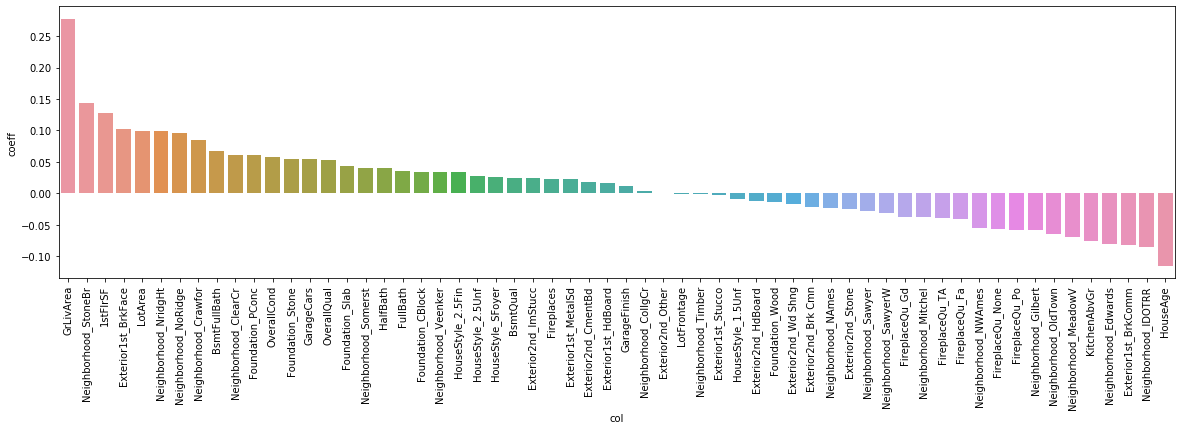

In [46]:
# ploting coeffs for Ridge Regression
plt.figure(figsize = [20,5])
a = sns.barplot(x = R_df['col'],y = R_df['coeff'])
a.set_xticklabels(labels = R_df['col'], rotation = 90)
plt.show()

According to Ridge Regression,below 10 features are most important in predicting house price:
    1. GrLivArea: Larger the above ground living area (square feet), higher the price of the house.
    2. Neighborhood_StoneBr : Houses having Stone Brook in neighborhood are priced higher.
    3. 1stFlrSF: Larger the first Floor area (square feet), higher te price of the house.
    4. HouseAge : Older the house, lesser the price.[negative relationship]
    5. Exterior1st_BrkFace : BrickFace exterior covering of the house are priced higher.
    6. LotArea: Larger the land size, higher the price of the house.
    7. Neighborhood_NridgHt : Houses having Northridge Heights in neighborhood are priced higher.
    8. Neighborhood_NoRidge :  Houses having no ridge in neighborhood are priced higher.
    9. Neighborhood_IDOTRR : Houses having Iowa DOT and Rail Road in neighborhood are priced higher. 
    10. Neighborhood_Crawfor : Houses having Crawford in neighborhood are priced higher.

### Subjective Questions
#### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

#### Answer 1-1

Optimal regulatization coeff. values for Ridge regression is 3 & for Lasso is 0.001.

#### Answer 1-2

##### For Ridge Regression

In [47]:
#For Ridge Regression
print(f'Mean absolute error for coeff. value of 3 is: {round(mean_absolute_error(RM.predict(X_test),y_test),3)}')

Mean absolute error for coeff. value of 3 is: 0.093


In [48]:
# Fitting Ridge instance on train data with twice the optimal value of ridge
RM = Ridge(alpha = 2*3)
RM.fit(X_train,y_train)
print(f'Mean absolute error for coeff. value of 6 is: {round(mean_absolute_error(RM.predict(X_test),y_test),3)}')

Mean absolute error for coeff. value of 6 is: 0.094


##### For Lasso Regression

In [49]:
#For Lasso Regression
print(f'Mean absolute error for coeff. value of 0.001 is: {round(mean_absolute_error(LM.predict(X_test),y_test),3)}')

Mean absolute error for coeff. value of 0.001 is: 0.096


In [50]:
# Fitting Lasso instance on train data with twice the optimal value of ridge
LM1 = Lasso(alpha = 2*0.001)
LM1.fit(X_train,y_train)
print(f'Mean absolute error for coeff. value of 0.002 is: {round(mean_absolute_error(LM1.predict(X_test),y_test),3)}')

Mean absolute error for coeff. value of 0.002 is: 0.1


After doubling the regularization coeffs. for Ridge & Lasso Regression, the mean absolute error is increased. It means that the solution is moving away from its optimal position as test set errors are increasing.
It can be noted that increase in mean absolute error in Lasso regression is more than Ridge regression.

#### Answer 1-3

##### For Ridge Regression

In [51]:
# Creating the Ridge selected coeff. dataframe
R_df = pd.DataFrame({'col':X_col,'coeff':RM.coef_})

# Removing the columns which are rejected by Lasso
R_df = R_df.sort_values(by = 'coeff',ascending = False)

# inspecting dataframe
R_df

,col,coeff
6,GrLivArea,0.256128
5,1stFlrSF,0.130280
31,Neighborhood_StoneBr,0.123319
1,LotArea,0.100634
39,Exterior1st_BrkFace,0.093922
26,Neighborhood_NridgHt,0.089123
25,Neighborhood_NoRidge,0.086804
17,Neighborhood_Crawfor,0.079340
7,BsmtFullBath,0.067143
51,Foundation_PConc,0.057894


Top 5 predictor variables for Ridge Regression with double regulatization coeff. :
    1. GrLivArea
    2. 1stFlrSF
    3. Neighborhood_StoneBr
    4. HouseAge
    5. LotArea

##### For Lasso Regression

In [52]:
# Creating the Lasso selected coeff. dataframe
L_df = pd.DataFrame({'col':X_col,'coeff':LM.coef_})

# Removing the columns which are rejected by Lasso
L_df = L_df[L_df['coeff']!=0].sort_values(by = 'coeff',ascending = False)

# inspecting dataframe
L_df

,col,coeff
6,GrLivArea,0.301221
5,1stFlrSF,0.112748
31,Neighborhood_StoneBr,0.104786
1,LotArea,0.097587
39,Exterior1st_BrkFace,0.081480
17,Neighborhood_Crawfor,0.074123
26,Neighborhood_NridgHt,0.073128
25,Neighborhood_NoRidge,0.070364
7,BsmtFullBath,0.066443
2,OverallQual,0.061162


Top 5 predictor variables for Lasso Regression with double regulatization coeff. :
    1. GrLivArea
    2. HouseAge
    3. 1stFlrSF
    4. LotArea
    5. OverallQual

#### Question 2

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

#### Answer 2

Lasso Regression is selected as it eliminates the less important features required for predicting House prices. Since, feature selection is the motive for this task, so, Lasso should be selected.
In case, if prediction was the main task, then, Ridge could be chosen as the mean absolute error for Ridge is lesser than Lasso Regression.

#### Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

#### Answer 3

In [53]:
# Selecting top 5 columns & dropping from dataset
top5_lasso = ['GrLivArea','HouseAge','1stFlrSF','Neighborhood_StoneBr','LotArea']
X_train_Q3 = X_train.drop(columns = top5_lasso,axis = 1)

# Instantiating Lasso
estimator = Lasso()

# Using 5 folds cross-validation
folds = 5

# Creating param dictionary
param_dict = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Initializing Grid Search CV with above parameters
LM2 = GridSearchCV(estimator = estimator,
                  cv = folds,
                  param_grid = param_dict,
                  return_train_score = True,
                  scoring = 'neg_mean_absolute_error',
                  verbose = True)

# Fitting Grid Search model with training dataset
LM2.fit(X_train_Q3,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    5.2s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=True)

In [54]:
# Finding best parameters
LM2.best_params_

{'alpha': 0.0001}

In [55]:
# Instantiating Lasso with best alpha value & fitting
LM2 = Lasso(alpha = 0.0001)

LM2.fit(X_train_Q3,y_train)

# Creating the Lasso selected coeff. dataframe
L_df2 = pd.DataFrame({'col':X_train_Q3.columns,'coeff':LM2.coef_})

# Removing the columns which are rejected by Lasso
L_df2 = L_df2[L_df2['coeff']!=0].sort_values(by = 'coeff',ascending = False)

# inspecting dataframe
L_df2

,col,coeff
11,Neighborhood_ClearCr,0.174952
21,Neighborhood_NoRidge,0.143471
5,FullBath,0.130628
0,LotFrontage,0.118598
30,HouseStyle_2.5Fin,0.110116
34,Exterior1st_BrkFace,0.106399
47,Foundation_Slab,0.103228
22,Neighborhood_NridgHt,0.097906
46,Foundation_PConc,0.096354
42,Exterior2nd_Other,0.095386


Top 5 predictor variables for updated Lasso Regression:
    1. Neighborhood_MeadowV
    2. Neighborhood_ClearCr
    3. Neighborhood_NoRidge
    4. FullBath
    5. LotFrontage